## Experimenting on training set 

The aim of the experiment is to find out the performance of the model regardless of how small our dataset can be.
 - `Steps`:
  - Firstly, we split our dataset into 594 test set and 1203 training set.
  - Then out of our training set we get an initial subsample of size 10. Making sure all our labels are well represented.
  - Afterwards we fit a model on the initail dataset and determine its accuracy. 
  - Later we randomly increase the subsample size to still we exhaust the training set. Each time fititng a model and determine its accuracy

### Importimg Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits


In [5]:
# Stop deprecation warnings from being printed

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

`Loading data`

In [6]:
digits = load_digits()


`Splitting the dataset into training and testing set.`

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.images, digits.target, test_size=0.33, random_state=42)


`We can see the size of the training data`

In [8]:
(len(X_train) ,len(Y_train))

(1203, 1203)

`We can see the size of the testing data`

In [9]:
(len(X_test), len(Y_test))

(594, 594)

In [12]:
def selector(y,pos):
    '''
    This function returns the indices
    to of each label
    y : is the array of labels
    pos : is the indicator of the label in the 
    ''' 

    ind = []
    for i in range(10):
        ind.append(np.argwhere(Y_train==i).reshape(1, -1)[0,pos])
    return ind

In [11]:
def Rand_checker(known_list, sample_size, upper_limit):
    '''
    This function generates random numbers
    to be used as subsequence indices for 
    the other sample
    
    know_list : is initial indice list
    
    sample_size : the size of the subsample to be generated
    
    upper_limit : is the len of the array of labels
    '''
    
    Rand_set = []
    while len(Rand_set) < sample_size:
        r = np.random.randint(upper_limit)
        if r not in Rand_set and r not in known_list:
            Rand_set.append(r)
    return Rand_set

In [13]:
def generate_index(known_list, sample_size, upper_limit):
    '''
    This function return the indices  for all
    for all the subsamples to be consider
    
    know_list : is initial indice list
    
    sample_size : the size of the subsample to be generated
    
    upper_limit : is the len of the array of labels
    
    '''
    index_lst=[]
    while len(known_list) < upper_limit:
        if sample_size > upper_limit - len(known_list):
            sample_size = upper_limit - len(known_list)
        index_lst.append(known_list.copy())
        L = Rand_checker(known_list, sample_size, upper_limit)
        known_list.extend(L)
    index_lst.append(known_list.copy())
    return index_lst

 ### Fitting the random forest model.
 
 Making model from the first initial subsample till the final one having step size of 10 increment everytime.

In [14]:
k = generate_index(selector(Y_train,0),10,len(X_train))

accuracy_results=[]
train_interval=[]
for i in k:
    rf_model = RandomForestClassifier(random_state=11)
    x_train = [X_train[j].reshape(64) for j in i]
    rf_model.fit(x_train, Y_train[i])
    train_interval.append(len(i))
    
    # predicting the model for X_test sample 
    
    x_test = [ X_test[l].reshape(64) for l in range(len(X_test))]
    y_predtest = rf_model.predict(x_test)

    # classification accuracy for the test data prediction verses actual

    pred_acc = accuracy_score(y_predtest, Y_test)
    accuracy_results.append(pred_acc)

Visualizing the result.

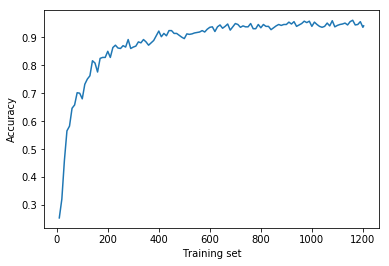

In [15]:
plt.plot(train_interval,accuracy_results)
plt.xlabel('Training set')
plt.ylabel('Accuracy')
plt.show()

From the above diagram with the accuracy level shows a progressing increasing level when we increase the sample size. The initail 10 data points had about 20% accuracy and when all the training was used there was an accuracy of about 90%. A significant improvement. From the diagram, we may conclude that we about 200 training set we can have a good model as the accuracy is about 80% on test data.